In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# columns Removed
data1=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data1.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
data1.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
# One Encoded on categorical Values
data1 = pd.get_dummies(data1,columns=['Geography','Gender'],drop_first=True)
data1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
# Extract Features And Target
x=data1.drop(columns=['Exited'])
y=data1.Exited.values
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
# Split Data To Train And Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape)

(8000, 11) (2000, 11)


In [11]:
# Scale the values same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
# import Library for ANN
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()
model.add(Dense(15,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=30,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
214/214 [==============================] - 4s 6ms/step - loss: 0.6581 - accuracy: 0.6522 - val_loss: 0.5162 - val_accuracy: 0.7969
Epoch 2/100
214/214 [==============================] - 1s 4ms/step - loss: 0.4777 - accuracy: 0.7986 - val_loss: 0.4577 - val_accuracy: 0.8012
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4420 - accuracy: 0.8073 - val_loss: 0.4414 - val_accuracy: 0.8062
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4273 - accuracy: 0.8141 - val_loss: 0.4310 - val_accuracy: 0.8100
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8188 - val_loss: 0.4213 - val_accuracy: 0.8156
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8261 - val_loss: 0.4115 - val_accuracy: 0.8206
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8320 - val_loss: 0.4024 - val_accuracy: 0.8231

Epoch 58/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8639 - val_loss: 0.3549 - val_accuracy: 0.8537
Epoch 59/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3304 - accuracy: 0.8631 - val_loss: 0.3549 - val_accuracy: 0.8531
Epoch 60/100
214/214 [==============================] - 1s 3ms/step - loss: 0.3303 - accuracy: 0.8625 - val_loss: 0.3552 - val_accuracy: 0.8525
Epoch 61/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3301 - accuracy: 0.8644 - val_loss: 0.3547 - val_accuracy: 0.8556
Epoch 62/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8636 - val_loss: 0.3547 - val_accuracy: 0.8506
Epoch 63/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8642 - val_loss: 0.3546 - val_accuracy: 0.8544
Epoch 64/100
214/214 [==============================] - 1s 4ms/step - loss: 0.3296 - accuracy: 0.8645 - val_loss: 0.3540 - val_accuracy:

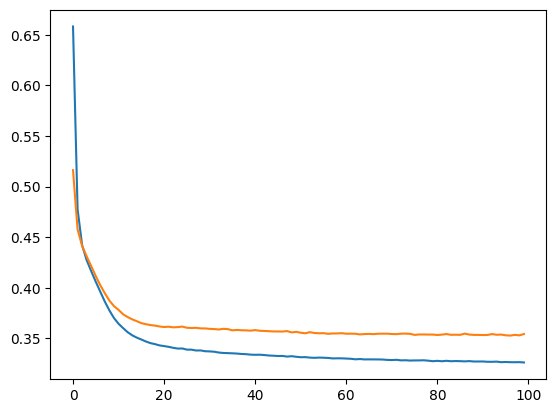

In [18]:
# visualize the model performance based on loss 
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

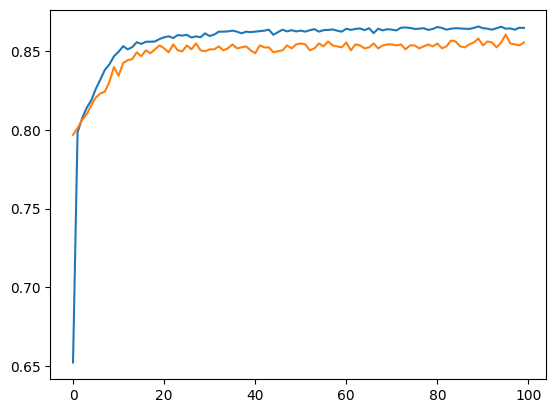

In [19]:
# Based on accuracy Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);

In [20]:
pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [21]:
pred

array([[0.29905438],
       [0.21362816],
       [0.10120998],
       ...,
       [0.23718488],
       [0.21005598],
       [0.13653632]], dtype=float32)

In [22]:
pred.shape

(2000, 1)

In [23]:
pred = pred.argmax(axis=-1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7975

In [25]:
# Data Source https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction
# Learing Resource CampusX youtube Channel.